In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import json
import os
import urllib
import tqdm

In [2]:
data_regions = ["CA", "DE", "FR", "GB", "IN", "JP", "KR", "MX", "RU", "US"]
data_types = ["_category_id.json", "videos.csv"]
data_dir = "./data/"
img_dir = "./img_temp/"
cur_dir = os.getcwd()
columns = ["video_id", "title", "description", "tags", "category_id", "channel_title",
           "publish_time", "trending_date", "views", "likes", "dislikes", "comment_count",
           "comments_disabled", "ratings_disabled", "video_error_or_removed", "thumbnail_link"]

In [3]:
def collect_categories():
    global categories
    categories = {}
    for region in data_regions:
        with open(data_dir + region + data_types[0]) as file:
            cats = json.loads(file.read())
        for item in cats["items"]:
            k, v = int(item["id"]), item["snippet"]["title"]
            if k in categories and categories[k] != v:
                print("ERROR: Category: " + str(k) + ", values: " + categories[k] + " and " + v)
            categories[k] = v

In [5]:
# def read_data():
# #     print(region)
#     str_region = region
    
#     if isinstance(region, int):
#         str_region = data_regions[region]
   
#     videos = pd.read_csv(data_dir + str_region + data_types[1],
#                          parse_dates=["publish_time"])[columns]
    
#     videos.trending_date = pd.to_datetime(videos.trending_date, format="%y.%d.%m")
#     videos.insert(7, "publish_date", pd.to_datetime(videos['publish_time'].dt.date))
#     videos.insert(8, "day_to_trending", videos.trending_date - videos.publish_date)
#     videos.day_to_trending = videos.day_to_trending.apply(lambda date: date.days)

#     uniq = videos.category_id.apply(lambda x: x if x not in categories else -1).unique()
    
#     if len(uniq) == 1:
#         videos.category_id = videos.apply(lambda x: categories[x.category_id], axis=1)
#     else:
#         print("ERROR: No category with ids " + str(uniq))

#     videos["tags"] = videos.apply(lambda row: convert_tag(row["tags"]), axis = 1)
#     videos["country"] = region
    
#     return videos[videos.video_id != "#NAME?"]

In [12]:
collect_categories()
data = {}
data['US'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/USvideos.csv')
data['CA'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/CAvideos.csv')
data['DE'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/DEvideos.csv')
data['FR'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/FRvideos.csv')
data['GB'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/GBvideos.csv')
data['IN'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/INvideos.csv')
data['JP'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/JPvideos.csv', encoding=('ISO-8859-5'))
data['KR'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/KRvideos.csv', encoding=('ISO-8859-5'))
data['MX'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/MXvideos.csv', encoding=('ISO-8859-5'))
data['RU'] = pd.read_csv('/home/anastasia/Downloads/Trending YouTube Video Statistics/Trending YouTube Video Statistics/RUvideos.csv', encoding=('ISO-8859-5'))
for key, table in data.items():
    table['country'] = key

In [13]:
all_videos = pd.concat(data)
# all_videos["counts"] = all_videos[["video_id", "trending_date"]].groupby("video_id").transform("count")
# all_videos["min_day_to_trending"] = all_videos[["video_id", "day_to_trending"]].groupby("video_id").transform("min")
all_videos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 375942 entries, ('US', 0) to ('RU', 40738)
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_remove

In [14]:
all_videos.head()

video_id trending_date  \
US 0  2kyS6SvSYSE      17.14.11   
   1  1ZAPwfrtAFY      17.14.11   
   2  5qpjK5DgCt4      17.14.11   
   3  puqaWrEC7tY      17.14.11   
   4  d380meD0W0M      17.14.11   

                                                  title  \
US 0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
   1  The Trump Presidency: Last Week Tonight with J...   
   2  Racist Superman | Rudy Mancuso, King Bach & Le...   
   3                   Nickelback Lyrics: Real or Fake?   
   4                           I Dare You: GOING BALD!?   

              channel_title  category_id              publish_time  \
US 0           CaseyNeistat           22  2017-11-13T17:13:01.000Z   
   1        LastWeekTonight           24  2017-11-13T07:30:00.000Z   
   2           Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
   3  Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
   4               nigahiga           24  2017-11-12T18:01:41.000Z   

                                                   tags    views   likes  \
US 0                                    SHANtell martin   748374   57527   
   1  last week tonight trump presidency|"last week ...  2418783   97185   
   2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
   3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
   4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

      dislikes  comment_count                                  thumbnail_link  \
US 0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
   1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
   2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
   3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
   4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
US 0              False             False                   False   
   1              False             False                   False   
   2              False             False                   False   
   3              False             False                   False   
   4              False             False                   False   

                                            description country  
US 0  SHANTELL'S CHANNEL - https://www.youtube.com/s...      US  
   1  One year after the presidential election, John...      US  
   2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...      US  
   3  Today we find out if Link is a Nickelback amat...      US  
   4  I know it's been a while since we did this sho...      US

In [17]:
data_no_duplicates = all_videos.copy()
data_no_duplicates = data_no_duplicates.sort_values('views')
data_no_duplicates = data_no_duplicates.drop_duplicates(subset = ['video_id'], keep = "last")
data_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 184287 entries, ('RU', 20314) to ('GB', 28412)
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                184287 non-null  object
 1   trending_date           184287 non-null  object
 2   title                   184287 non-null  object
 3   channel_title           184287 non-null  object
 4   category_id             184287 non-null  int64 
 5   publish_time            184287 non-null  object
 6   tags                    184287 non-null  object
 7   views                   184287 non-null  int64 
 8   likes                   184287 non-null  int64 
 9   dislikes                184287 non-null  int64 
 10  comment_count           184287 non-null  int64 
 11  thumbnail_link          184287 non-null  object
 12  comments_disabled       184287 non-null  bool  
 13  ratings_disabled        184287 non-null  bool  
 14  video_error_or_re

Рассмотрим самые популярные категории по странам. Анализируем по просмотрам.

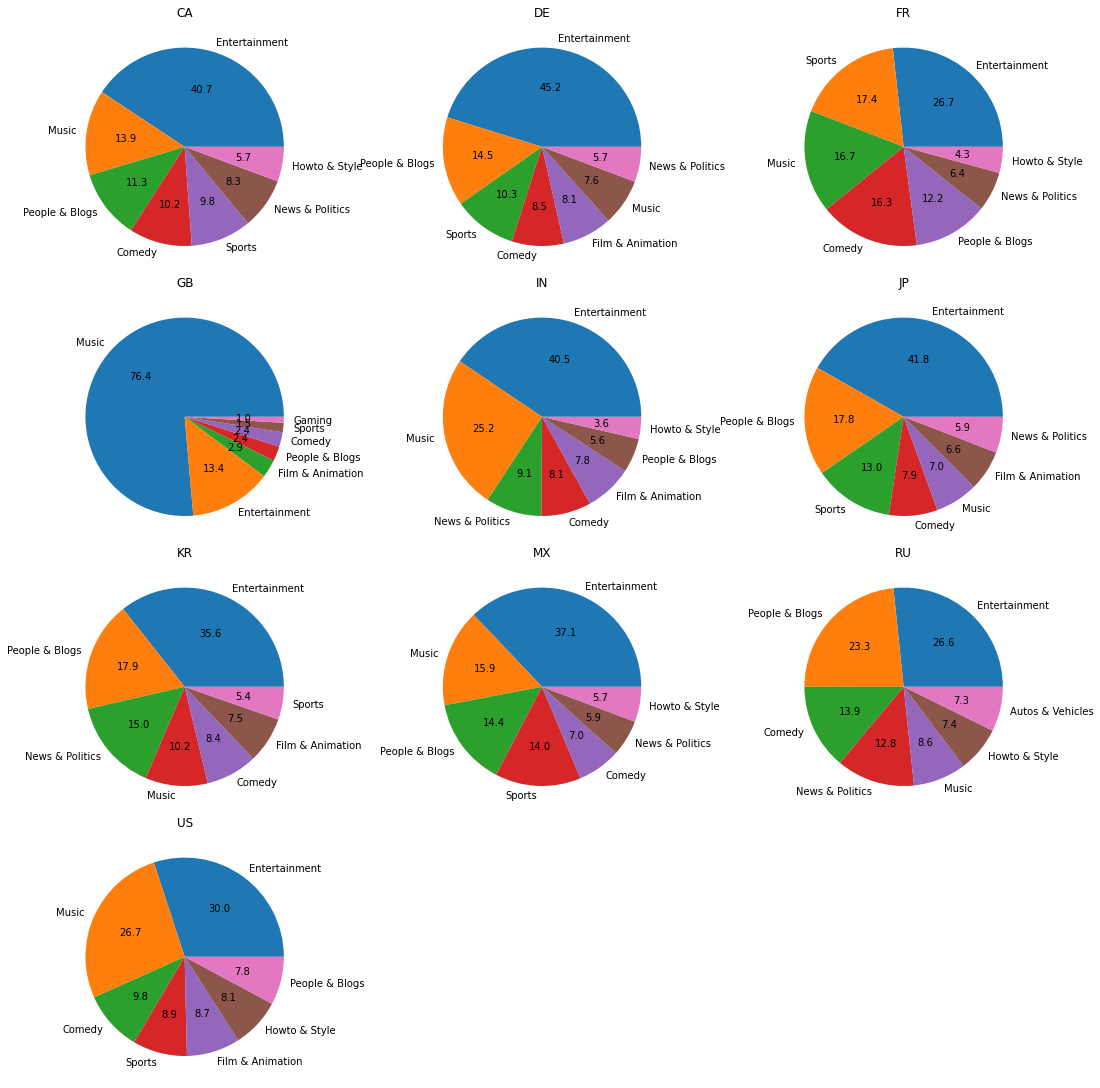

In [57]:
fg = plt.figure(figsize=(15, 15), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=4, figure=fg)

info = data_no_duplicates.groupby(['country', 'category_id'])['views'].sum()
for j, reg in enumerate(data_regions):
    names_of_categories = []
    values = []
    for i, val in info[reg].sort_values(ascending=False).items():
        names_of_categories.append(categories[i])
        values.append(val)

    fig_ax_1 = fg.add_subplot(gs[j // 3, j % 3])
    plt.title(reg)
    plt.pie(values[:7], autopct='%.1f', labels = names_of_categories[:7], radius=1)

plt.show()

Самый популярный жанр - развлечение (если судить по просмотрам). Только для Великобритании - это музыка. Далее идут блоги, спорт, комедия и политика в разном порядке в зависимости от страны.

Посмотрим на соотношение жанров по странам.

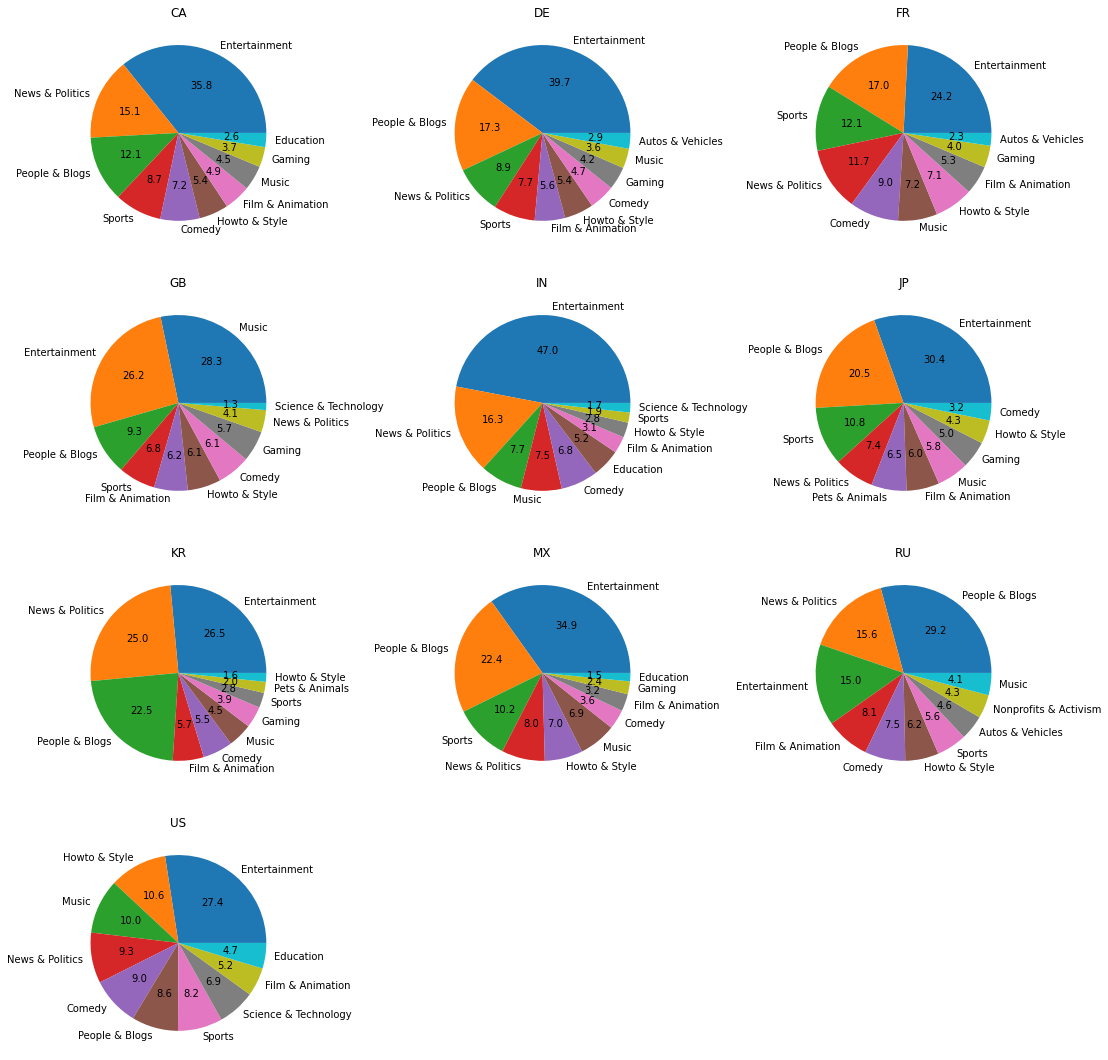

In [56]:
fg = plt.figure(figsize=(15, 15), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=4, figure=fg)

info = data_no_duplicates.groupby('country')['category_id'].value_counts()
for j, reg in enumerate(data_regions):
    names_of_categories = []
    values = []
    for i, val in info[reg].sort_values(ascending=False).items():
        names_of_categories.append(categories[i])
        values.append(val)

    fig_ax_1 = fg.add_subplot(gs[j // 3, j % 3])
    plt.title(reg)
    plt.pie(values[:10], autopct='%.1f', labels = names_of_categories[:10], radius=1)

plt.show()

Для всех стран больше всего видео по следующем жанрам:
1. Развлечения
2. Музыка
3. Люди и блоги
4. Новости и политика

Посмотрим на соотношение лайков и дизлайков по странам.

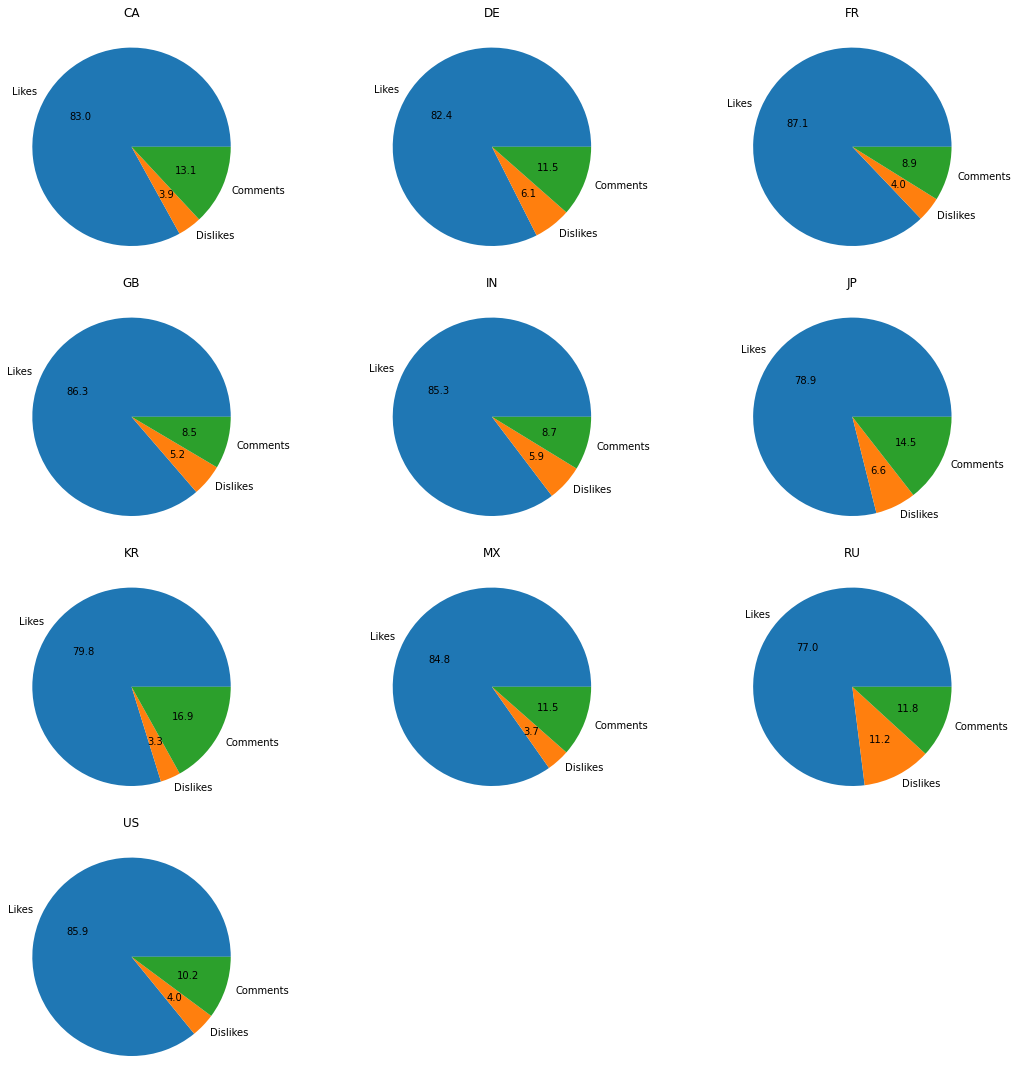

In [65]:
fg = plt.figure(figsize=(15, 15), constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=4, figure=fg)

likes = data_no_duplicates.groupby('country')['likes'].sum()
dislikes = data_no_duplicates.groupby('country')['dislikes'].sum()
comments = data_no_duplicates.groupby('country')['comment_count'].sum()

for j, reg in enumerate(data_regions):
    fig_ax_1 = fg.add_subplot(gs[j // 3, j % 3])
    plt.title(reg)
    plt.pie([likes[reg], dislikes[reg], comments[reg]], autopct='%.1f',
            radius=1, labels=['Likes', 'Dislikes', 'Comments'])

plt.show()

Можно заметить, что больше всего дизлайков в соотношении в России. А Южная Корея является наиболее активной по комментариям.